In [70]:
#import library


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [71]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [72]:
df.shape

(1338, 7)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [74]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [75]:
df.duplicated().sum()

1

In [76]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

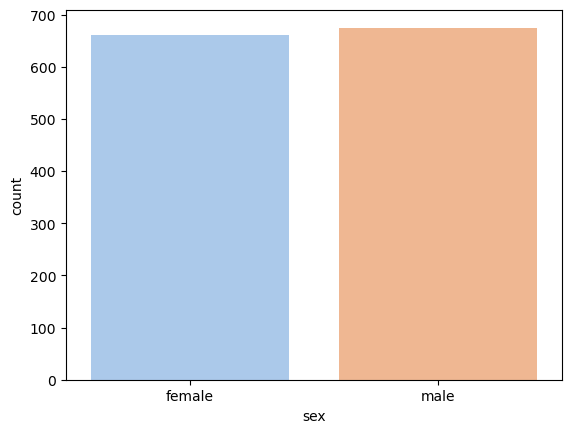

In [77]:
sns.countplot(x="sex",data=df,palette="pastel")
plt.show()

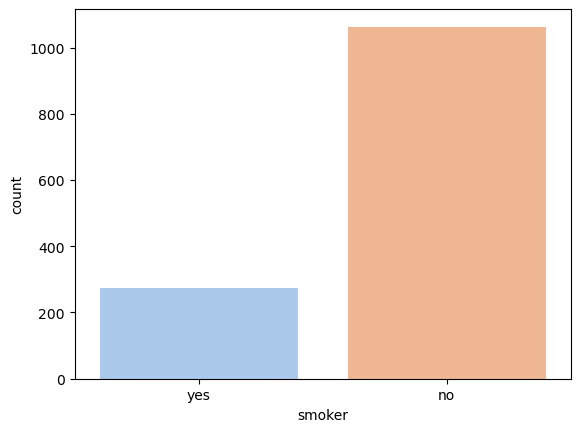

In [78]:
sns.countplot(x="smoker",data=df,palette="pastel")
plt.show()

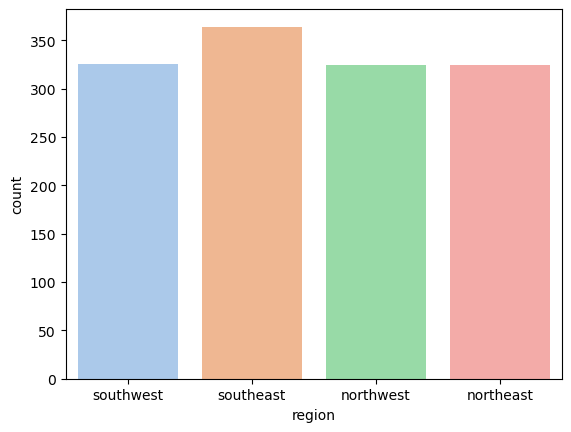

In [79]:
sns.countplot(x='region', data=df, palette='pastel')
plt.show()

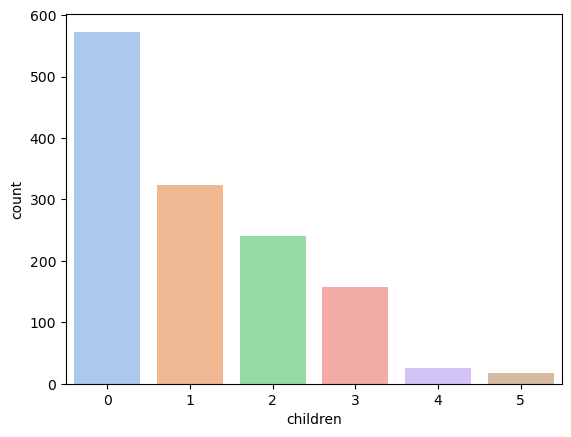

In [80]:
sns.countplot(x='children', data=df, palette='pastel')
plt.show()

<Axes: ylabel='Density'>

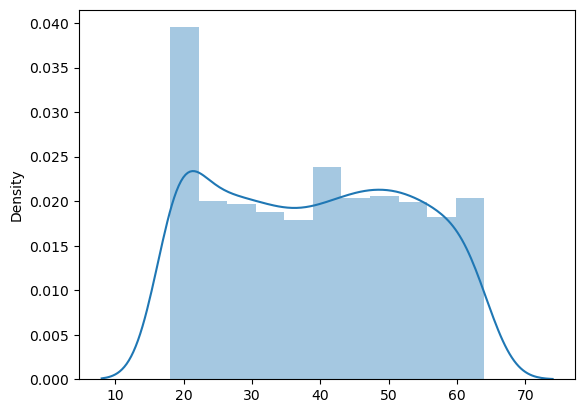

In [81]:
sns.distplot(x = df['age'])

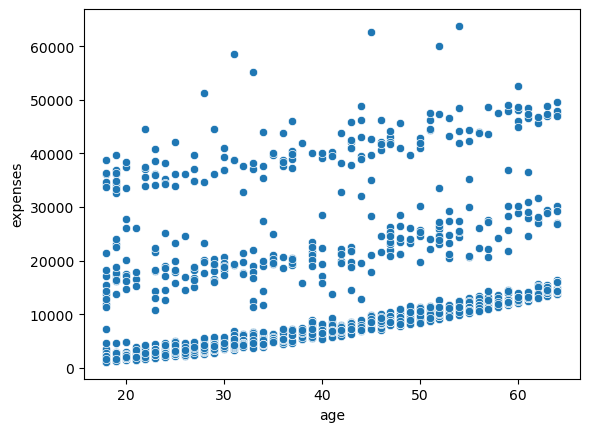

In [82]:
sns.scatterplot(x = df['age'],y=df['expenses'])
plt.show()

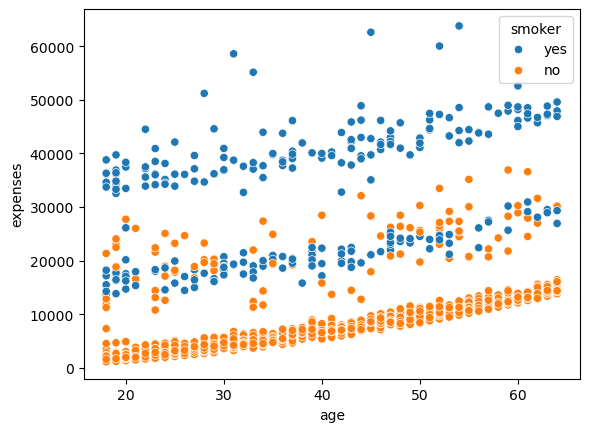

In [83]:
sns.scatterplot(x = df['age'],y=df['expenses'],hue=df['smoker'])
plt.show()

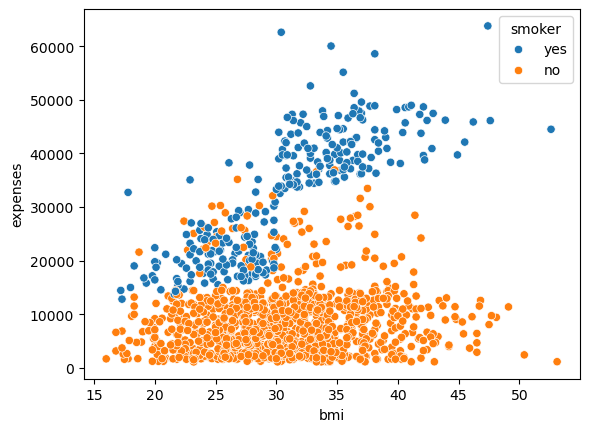

In [84]:
sns.scatterplot(x = df['bmi'],y=df['expenses'],hue=df['smoker'])
plt.show()

In [85]:
num_fea=df[['age','bmi','children','expenses']]
num_fea.head()

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86


In [86]:
num_fea.corr()

,age,bmi,children,expenses
age,1.000000,0.109414,0.041536,0.298308
bmi,0.109414,1.000000,0.012641,0.198637
children,0.041536,0.012641,1.000000,0.067389
expenses,0.298308,0.198637,0.067389,1.000000


<Axes: >

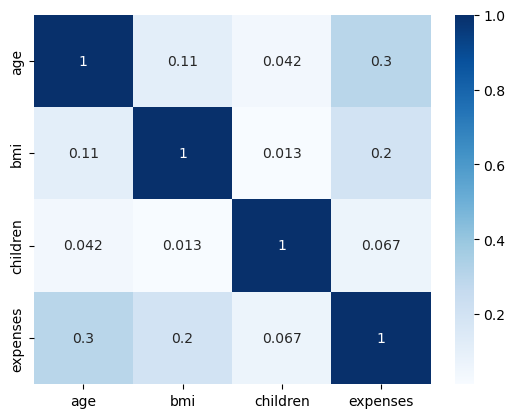

In [87]:
sns.heatmap(num_fea.corr(),annot=True,cmap='Blues')

In [88]:
# get dummies on data
df=pd.get_dummies(df,drop_first=True)
df.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,False,True,False,False,True
1,18,33.8,1,1725.55,True,False,False,True,False
2,28,33.0,3,4449.46,True,False,False,True,False
3,33,22.7,0,21984.47,True,False,True,False,False
4,32,28.9,0,3866.86,True,False,True,False,False


In [89]:
df.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


In [90]:
# independent and dependent features
x=df.drop('expenses',axis=1)
y=df['expenses']
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,False,True,False,False,True
1,18,33.8,1,True,False,False,True,False
2,28,33.0,3,True,False,False,True,False
3,33,22.7,0,True,False,True,False,False
4,32,28.9,0,True,False,True,False,False


In [91]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
x= pd.DataFrame(scalar.fit_transform(x),columns=x.columns)
x.head()


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.021739,0.320755,0.0,0.0,1.0,0.0,0.0,1.0
1,0.000000,0.479784,0.2,1.0,0.0,0.0,1.0,0.0
2,0.217391,0.458221,0.6,1.0,0.0,0.0,1.0,0.0
3,0.326087,0.180593,0.0,1.0,0.0,1.0,0.0,0.0
4,0.304348,0.347709,0.0,1.0,0.0,1.0,0.0,0.0


In [92]:
x.describe()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,0.461351,0.395297,0.219147,0.504862,0.204936,0.242334,0.272251,0.243082
std,0.305312,0.164438,0.241114,0.500163,0.403806,0.428655,0.445285,0.429104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.277628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.456522,0.388140,0.200000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.717391,0.504043,0.400000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
x=df.drop('expenses',axis=1)
y=df['expenses']
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,False,True,False,False,True
1,18,33.8,1,True,False,False,True,False
2,28,33.0,3,True,False,False,True,False
3,33,22.7,0,True,False,True,False,False
4,32,28.9,0,True,False,True,False,False


In [94]:
#train and text split
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape,y_train.shape,y_train.shape

((1069, 8), (268, 8), (1069,), (1069,))

In [95]:
#linear regression model
from sklearn.linear_model import LinearRegression
model_LR=LinearRegression()
model_LR.fit(x_train,y_train)

LinearRegression()

In [96]:
from sklearn.metrics import r2_score
LR_Accuracy=round(r2_score(y_test,model_LR.predict(x_test))*100)
LR_Accuracy

81

In [97]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
model_DT=DecisionTreeRegressor()
model_DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [98]:
DT_Accuracy = round(r2_score(y_test,model_DT.predict(x_test))*100)
DT_Accuracy

81

In [99]:
from sklearn.ensemble import RandomForestRegressor
model_RFR = RandomForestRegressor()
model_RFR.fit(x_train,y_train)

RandomForestRegressor()

In [100]:
RFR_Accuracy = round(r2_score(y_test,model_RFR.predict(x_test))*100)
RFR_Accuracy

88

In [101]:
from sklearn.svm import SVR

model_SVR = SVR()
model_SVR.fit(x_train, y_train)
SVR_Accuracy = round(r2_score(y_test, model_SVR.predict(x_test)) * 100)
SVR_Accuracy

-13

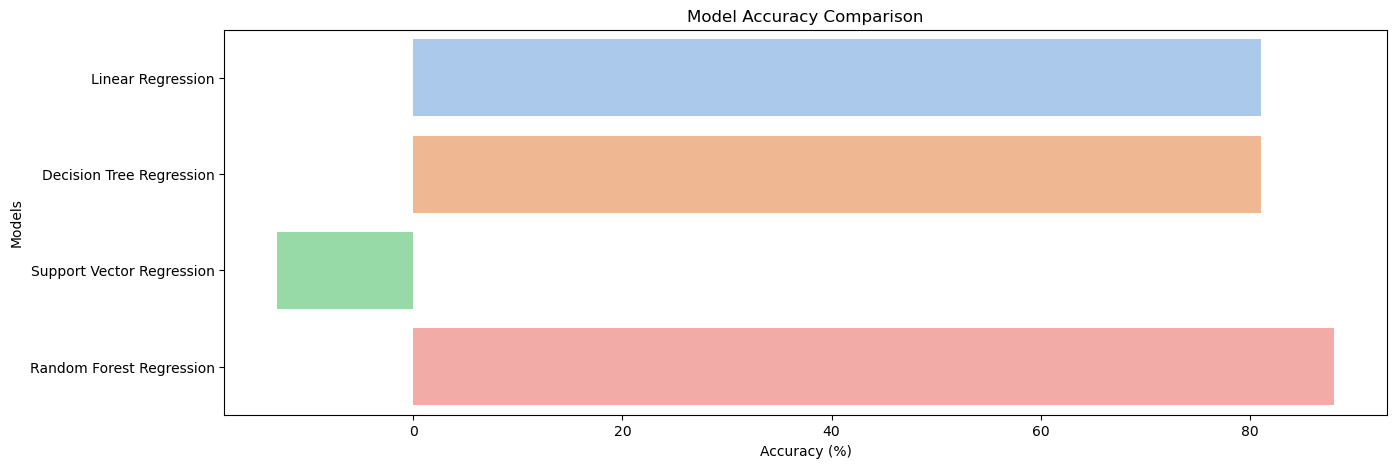

In [102]:
models = ["Linear Regression","Decision Tree Regression","Support Vector Regression","Random Forest Regression"]
Accuracy = [LR_Accuracy, DT_Accuracy, SVR_Accuracy, RFR_Accuracy]

plt.figure(figsize=(15, 5))

sns.barplot(x=Accuracy, y=models, palette='pastel')

plt.xlabel("Accuracy (%)")

plt.ylabel("Models")

plt.title("Model Accuracy Comparison")

plt.show()

<Axes: >

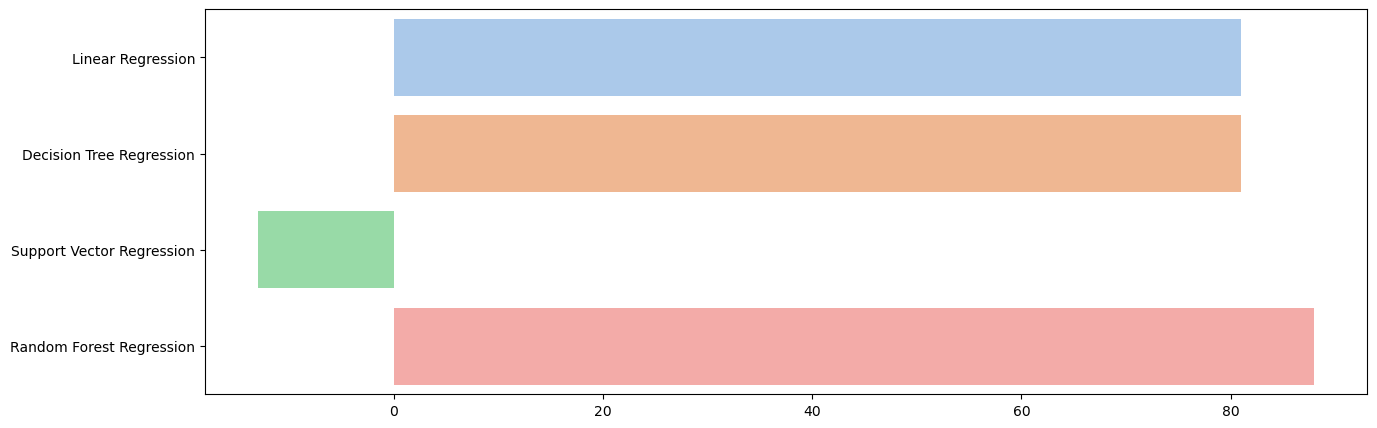

In [103]:
plt.figure(figsize=(15,5))
sns.barplot(x=Accuracy,y=models,palette="pastel")

In [104]:
input_data = (25,27.9,2,1,0,0,1,0)
input_data = np.asarray(input_data)
input_data = scalar.transform(input_data.reshape(1,-1))
prediction = model_RFR.predict(input_data)
print(prediction)

[1612.4956]


In [105]:
import pickle
pickle.dump(model_RFR,open("model_RFR.pkl","wb"))

In [106]:
pickle.dump(scalar,open("scalar.pkl","wb"))